# <center> <font color=Darkred> THE CLASSIFICATION PROJECT <center>

<img src="https://deliverit.ae/wp-content/uploads/2024/08/What-is-a-delivery-service.png" width=800>

In this project, The "failure" data which is about a delivery company is handled. Classification models are trained in order to predict the target variable "failure". However, There is a problem:

There is an imbalance in the categories of the "failure" variable in terms of the number of the observations. In other words, There is a great many difference among the number of observations belonging to minority and majority classes. This reduces the model's performance in predicting the minority class. In order to prevent from this problem , the SMOTE method is used.


**COLUMNS:**
    
    date
    device
    failure
    attribue1
    attribute2
    attribute3
    attribute4
    attribute5
    attribute6
    attribute7
    attribute8
    attribute9

## <font color=darkblue> PACKAGES & DATA IMPORTING

In [17]:
import pandas as pd
import seaborn as sns 
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [18]:
df = pd.read_csv("failure.csv")

## <font color=darkblue> EDA - Exploratory Data Analysis

In [19]:
df.head()

,date,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [20]:
df.info() # Data types for every variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   date        124494 non-null  object
 1   device      124494 non-null  object
 2   failure     124494 non-null  int64 
 3   attribute1  124494 non-null  int64 
 4   attribute2  124494 non-null  int64 
 5   attribute3  124494 non-null  int64 
 6   attribute4  124494 non-null  int64 
 7   attribute5  124494 non-null  int64 
 8   attribute6  124494 non-null  int64 
 9   attribute7  124494 non-null  int64 
 10  attribute8  124494 non-null  int64 
 11  attribute9  124494 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [21]:
df.shape # the numbers of rows and columns

(124494, 12)

In [22]:
df.isnull().sum()  # Is there any missing value?

date          0
device        0
failure       0
attribute1    0
attribute2    0
attribute3    0
attribute4    0
attribute5    0
attribute6    0
attribute7    0
attribute8    0
attribute9    0
dtype: int64

In [23]:
df["failure"].value_counts() # The number of categories in the "failure" variable

failure
0    124388
1       106
Name: count, dtype: int64

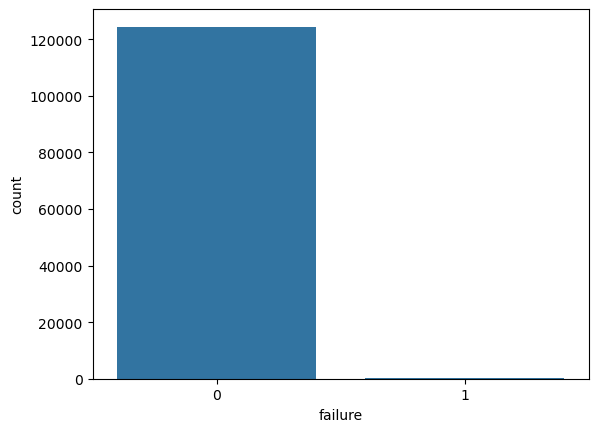

In [24]:
sns.countplot(x=df["failure"]); # Bar chart for the frequences of the categories in the "failure"

In [25]:
df.describe().T # Descriptive Basic Statistics

,count,mean,std,min,25%,50%,75%,max
failure,124494.0,8.514467e-04,2.916725e-02,0.0,0.0,0.0,0.0,1.0
attribute1,124494.0,1.223868e+08,7.045960e+07,0.0,61276754.0,122795744.0,183308370.0,244140480.0
attribute2,124494.0,1.594848e+02,2.179658e+03,0.0,0.0,0.0,0.0,64968.0
attribute3,124494.0,9.940455e+00,1.857473e+02,0.0,0.0,0.0,0.0,24929.0
attribute4,124494.0,1.741120e+00,2.290851e+01,0.0,0.0,0.0,0.0,1666.0
attribute5,124494.0,1.422269e+01,1.594302e+01,1.0,8.0,10.0,12.0,98.0
attribute6,124494.0,2.601729e+05,9.915101e+04,8.0,221452.0,249799.5,310266.0,689161.0
attribute7,124494.0,2.925282e-01,7.436924e+00,0.0,0.0,0.0,0.0,832.0
attribute8,124494.0,2.925282e-01,7.436924e+00,0.0,0.0,0.0,0.0,832.0
attribute9,124494.0,1.245152e+01,1.914256e+02,0.0,0.0,0.0,0.0,18701.0


## <font color=darkblue> Test & Train

In [27]:
x = df.drop(["date", "failure", "device"], axis=1) # Independent Variables - Drop unnecessary features and the target variable 

In [28]:
y = df["failure"] # The categorical target variable which will be predicted with classification methods

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.20, random_state=42)

# 20% of the data and 80% of the data are separated into the test and train sets respectively.

**SMOTE METHOD**

SMOTE is applied on the train set train set.

In [30]:
oversample = SMOTE()
x_train, y_train= oversample.fit_resample(x_train, y_train)

In [31]:
y_train.value_counts()

failure
0    99507
1    99507
Name: count, dtype: int64

**After the SMOTE application, The numbers of observations in the classes of minority and majority are equalized.**

# <font color=darkblue> CLASSIFICATION 

### <font color=darkblue> Gaussian Naive Bayesian Classifier

In [32]:
g = GaussianNB() # Gaussian Model

In [33]:
g.fit(x_train, y_train) # Model Training

GaussianNB()

In [34]:
gtahmin = g.predict(x_test) # Predictions

In [35]:
accuracy_score(gtahmin, y_test) # Model Prediction Performance Score

0.9934937146070123

In [36]:
confusion_matrix(gtahmin, y_test) # The Number of Correct and Incorrect Predictions in the classes

array([[24733,    14],
       [  148,     4]], dtype=int64)

**24733 values in the Class 0 were predicted correctly and 148 values in the Class 0 were predicted incorrectly.**

**14 values in the Class 1 were predicted uncorrectly but 4 values in the Class 1 were predicted correctly.**

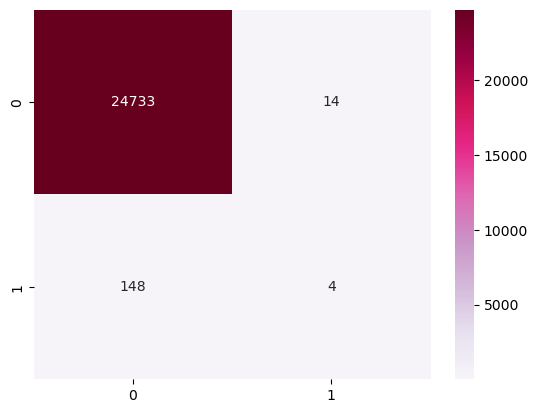

In [89]:
sns.heatmap(confusion_matrix(gtahmin, y_test), annot=True, cmap='PuRd', fmt='d'); 

#The heatmap for the number of correct and uncorrect predictions in the classes

In [38]:
print(classification_report(gtahmin, y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     24747
           1       0.22      0.03      0.05       152

    accuracy                           0.99     24899
   macro avg       0.61      0.51      0.52     24899
weighted avg       0.99      0.99      0.99     24899



**The accuracy score of the model is 0.99. so the model seems successful. However, while 99% of the class 0 was predicted correctly, 22% of the class 1 was predicted correctly. The model is unsuccessful in the prediction of the Class 1.**

### <font color=darkblue> Bernoulli Naive Bayesian Classifier

In [39]:
b = BernoulliNB() # Bernoulli Model

In [40]:
b.fit(x_train, y_train) # Model Training

BernoulliNB()

In [41]:
btahmin = b.predict(x_test) # Predictions

In [42]:
accuracy_score(btahmin, y_test) # Model Performance Score 

0.9736535603839511

**Accuracy score is more than %85. This means that the general performance of the classification model is successful.**

In [43]:
confusion_matrix(btahmin, y_test)

array([[24233,     8],
       [  648,    10]], dtype=int64)

**According to the confusion matrix above, 24233 predictions in the class 0 are correct, while 648 predictions in the class 0 are incorrect.**

**8 values in the Class 1 were predicted incorrectly, while 10 values in the Class 1 were predicted correctly.**

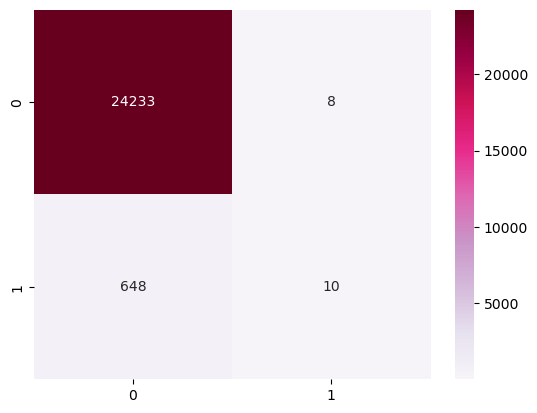

In [90]:
sns.heatmap(confusion_matrix(btahmin, y_test), annot=True, cmap='PuRd', fmt='d');

# Heatmap for correct and incorrect predictions of the classes 

In [45]:
print(classification_report(btahmin, y_test)) 

              precision    recall  f1-score   support

           0       0.97      1.00      0.99     24241
           1       0.56      0.02      0.03       658

    accuracy                           0.97     24899
   macro avg       0.76      0.51      0.51     24899
weighted avg       0.96      0.97      0.96     24899



**Accuracy score reduced to 0.97 however, the amount of this decrease can be ignored. The model prediction performance for class 1 has increased to 0.56 according to the Precision score.**

### <font color=darkblue> Logistic Regression Model

In [46]:
l = LogisticRegression() # Logistic Regression Model

In [47]:
l.fit(x_train, y_train) # Model fitting

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
ltahmin = l.predict(x_test) # predictions

In [49]:
accuracy_score(ltahmin, y_test) # General score 

0.9616048837302703

In [50]:
confusion_matrix(ltahmin, y_test)

array([[23934,     9],
       [  947,     9]], dtype=int64)

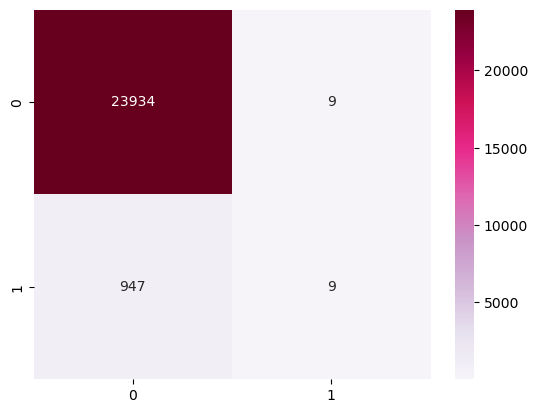

In [91]:
sns.heatmap(confusion_matrix(ltahmin, y_test), annot=True, cmap='PuRd', fmt='d');

In [52]:
print(classification_report(ltahmin, y_test))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     23943
           1       0.50      0.01      0.02       956

    accuracy                           0.96     24899
   macro avg       0.73      0.50      0.50     24899
weighted avg       0.94      0.96      0.94     24899



**Prediction performance has decreased to 0.96 but this model is also successful and Precision score for the Class 1 has increased to 0.50.**

### <font color=darkblue> Decision Tree Classifier

In [53]:
d = DecisionTreeClassifier() # Decision Tree Model

In [54]:
d.fit(x_train, y_train) # Model Fitting

DecisionTreeClassifier()

In [55]:
dtahmin = d.predict(x_test) # predictions

In [56]:
accuracy_score(dtahmin, y_test) # Model performance score generally

0.9961845857263344

In [57]:
confusion_matrix(dtahmin, y_test)

array([[24799,    13],
       [   82,     5]], dtype=int64)

**In the Class 0, 24799 values were predicted correctly but 82 values were predicted incorrectly.**

**In the class 1, 13 values were predicted correctly but 5 values were predicted incorrectly.**

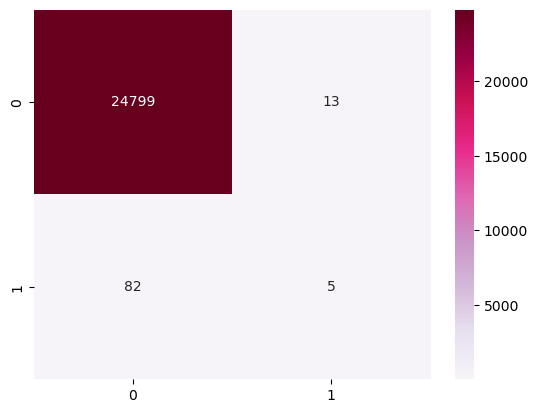

In [92]:
sns.heatmap(confusion_matrix(dtahmin, y_test), annot=True, cmap='PuRd', fmt='d');

In [59]:
print(classification_report(dtahmin, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24812
           1       0.28      0.06      0.10        87

    accuracy                           1.00     24899
   macro avg       0.64      0.53      0.55     24899
weighted avg       0.99      1.00      0.99     24899



**The accuracy score has increased to 0.99 however the prediction performance score for the Class 1 has decreased to 28%.**


### <font color=darkblue> Random Forest Classifer

In [60]:
r = RandomForestClassifier() # Random Forest Model

In [61]:
r.fit(x_train, y_train) # model training by using train sets 

RandomForestClassifier()

In [62]:
rtahmin = r.predict(x_test) # predictions

In [63]:
accuracy_score(rtahmin, y_test) 

0.9973492911361902

In [64]:
confusion_matrix(rtahmin, y_test)

array([[24830,    15],
       [   51,     3]], dtype=int64)

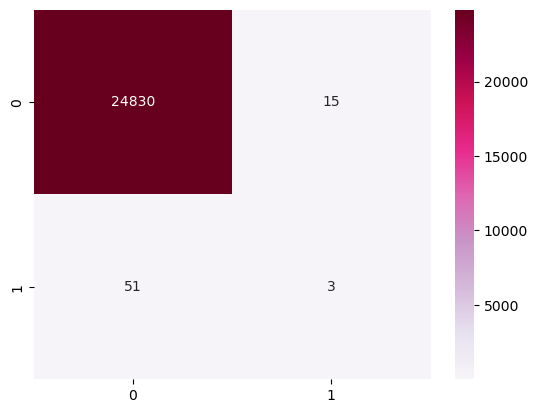

In [93]:
sns.heatmap(confusion_matrix(rtahmin, y_test), annot=True, cmap='PuRd', fmt='d');

In [66]:
print(classification_report(rtahmin, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24845
           1       0.17      0.06      0.08        54

    accuracy                           1.00     24899
   macro avg       0.58      0.53      0.54     24899
weighted avg       1.00      1.00      1.00     24899



**Accuracy score for general model performance and the precision score for the Class 1 have decreased to 0.17.**

### <font color=darkblue> Gradient Boosting Classifier

In [67]:
h=GradientBoostingClassifier() # Gradient Boosting Model

In [68]:
h.fit(x_train, y_train) # fitting (training) model

GradientBoostingClassifier()

In [69]:
htahmin = h.predict(x_test) # predictions

In [70]:
accuracy_score(htahmin, y_test) # General Model Performance Score

0.9553797341258685

In [71]:
confusion_matrix(htahmin, y_test)

array([[23775,     5],
       [ 1106,    13]], dtype=int64)

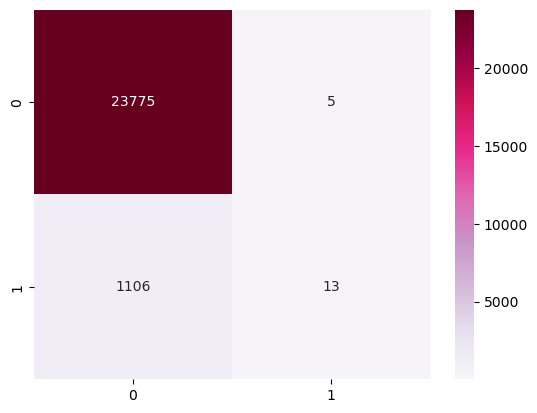

In [94]:
sns.heatmap(confusion_matrix(htahmin, y_test), annot=True, cmap='PuRd', fmt='d');

In [73]:
print(classification_report(htahmin, y_test))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98     23780
           1       0.72      0.01      0.02      1119

    accuracy                           0.96     24899
   macro avg       0.84      0.51      0.50     24899
weighted avg       0.95      0.96      0.93     24899



**Model accuracy score is 96% and precision score for the Class 1 predictions has increased to 0.72.**

### <font color=darkblue> K Neighbors Classifier

In [74]:
k = KNeighborsClassifier() # K-Neighbors Model

In [75]:
k.fit(x_train, y_train) # training the model

KNeighborsClassifier()

In [76]:
ktahmin = k.predict(np.array(x_test)) # predictions the target value in the test set

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [77]:
accuracy_score(ktahmin, y_test)

0.7892284830716093

In [78]:
confusion_matrix(ktahmin, y_test)

array([[19645,    12],
       [ 5236,     6]], dtype=int64)

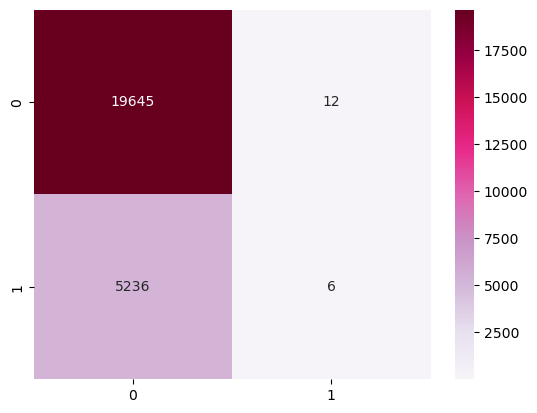

In [95]:
sns.heatmap(confusion_matrix(ktahmin, y_test), annot=True, cmap='PuRd', fmt='d');

In [80]:
print(classification_report(ktahmin, y_test))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88     19657
           1       0.33      0.00      0.00      5242

    accuracy                           0.79     24899
   macro avg       0.56      0.50      0.44     24899
weighted avg       0.69      0.79      0.70     24899



**Model accuracy score has decreased to 0.79. There is an increase in a big amount. Similarly, Precision score for Class 1 is inadequate.**

## <font color=darkblue> THE RESULT:

**<font color=darkred> The most appropriate model is the Gradient Boosting model.**
    
**<font color=darkred>Accuracy score: 0.96 (>0.85)**
    
**<font color=darkred>0 Precision: 0.96**
    
**<font color=darkred>1 Precision: 0.72 (the highest precision score for the Class 1 belongs to the Gradient Boosting Model.**